# **M2 BIM - GPOP project**

Project by: _Yann ZHONG_

Student ID: _28710333_

In [786]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statistics
import random
from itertools import groupby
from __future__ import division
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100             # For changing figure size in VScode

### **GPOP: simulating an evolving population**
The **objective of the project** is the simulation of a simple population-genetics model to observe
the influence of genetic drift, mutations, selection and population structure on the evolution of
the population. The simulations will be done using a **clonal version of the Wright-Fisher model**:

    - The population is formed by N haploid individuals, each one carrying one allele for a given locus.
    - The population evolves with constant population size and discrete non-overlapping generations.
    - Each individual in generation t+1 is a copy of a randomly selected individual in generation t.

According to the situation to be studied, the selection can be fitness dependent, or mutations
between parent and offspring may appear with some mutation rate.

### **1) Genetic drift**
Study a finite population without selection and mutation, but initialized with two different
alleles A and B having allele frequencies p and q = 1 – p. Simulate the population to (a)
trace the allele frequencies over time; (b) determine the fixation probability of allele A in
dependence of p; (c) estimate the expected fixation time (number of generations) in
dependence of N. Simulation results are to be compared to the analytical results derived in
the lectures.

**Note 1**: The analytical results in the lectures concern probabilities and expectation values.
To enable a comparison, the evolution of the population has to be simulated several times,
with identical initialisation but different realisations of the random parent selections, to
estimate empirical fractions and averages.

**Note 2**: When comparing to analytical results, you have to consider that the simulated
population is a clonal population of N alleles, not a population of diploid individuals with 2N
alleles.

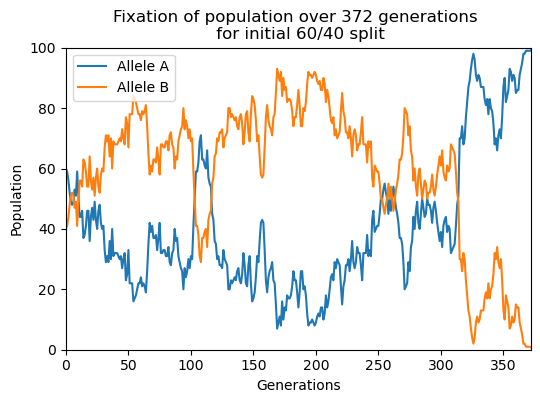

In [869]:
# ----- Initialize simulation variables ----- # 

p = 0.6               # Allele A probability
q = 1-p               # Allele B probability
generations = 750     # Around > 250 seems decent, otherwise don't always get fixation
population = 100                     

# ----- Clonal non diploid population simulation function ----- #                              

def clonal_population(p,q,generations,population):

    p_population = p*population     # Only for initial p population
    q_population = q*population     # Only for initial p population
    whole_pop_distribution = []     # Empty list for storing all subsequent iterations

    fixation_time = 0               # Generation when one allele has dominated and the other disappeared
    fixed_allele = "Z"

    current_pop_distribution = [p_population,q_population]
    whole_pop_distribution.append(current_pop_distribution)

    for i in range(generations):                             # Iterate a set number of generations
        
        current_pop_distribution = [0 for i in range(2)]     # Empty list each iteration
        p = whole_pop_distribution[i][0]                     # Get new probability based on last generation
        q = 1-p

        for j in range(population):                          # For every member of population,               
            if np.random.random()*population < p:            # Use np.random to determine allele
                current_pop_distribution[0] += 1             # We have picked A as RNG < p
            else:
                current_pop_distribution[1] += 1             # We have picked B as RNG > p
        whole_pop_distribution.append(current_pop_distribution)

        if current_pop_distribution[0]*current_pop_distribution[1] == 0:    # If product of p and q is 0, aka if one population became 0
            if(current_pop_distribution[1]==0):
                fixed_allele = "A"
            else:
                fixed_allele = "B"
            # print("Fixation reached for allele "+str(fixed_allele))
            break                                            

        fixation_time+=1                                                    # Increment fixation time if we haven't reached fixation

    return whole_pop_distribution,fixation_time,fixed_allele                # Return a list of length = fixation time that has reached fixation + the fixation time + fixed allele

distribution,fix_time,fixed_allele = clonal_population(p,q,generations,population)       # Gets one instance of a distribution
distribution_list_p = [p[0] for p in distribution]                                       # Get all "p" elements
distribution_list_q = [q[1] for q in distribution]                                       # Get all "q" elements

ax1 = plt.axes (xlim=(0,fix_time),ylim=(0,population))                                   # Limit axes for better view
plt.xlabel("Generations")
plt.ylabel("Population")
plt.title("Fixation of population over "+str(fix_time)+" generations \n for initial 60/40 split")

gen = np.arange(0,fix_time+2,1)
plt.plot(gen,distribution_list_p,label="Allele A")
plt.plot(gen,distribution_list_q,label="Allele B")
plt.legend(loc="upper left")

plt.show()

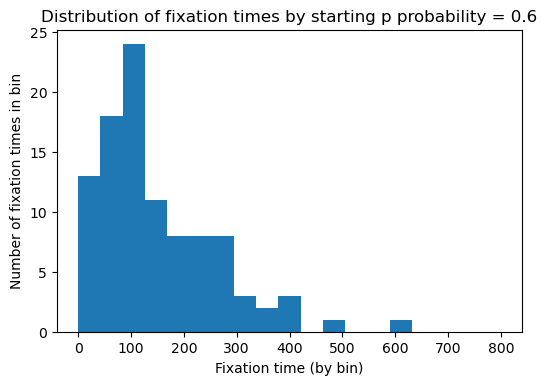

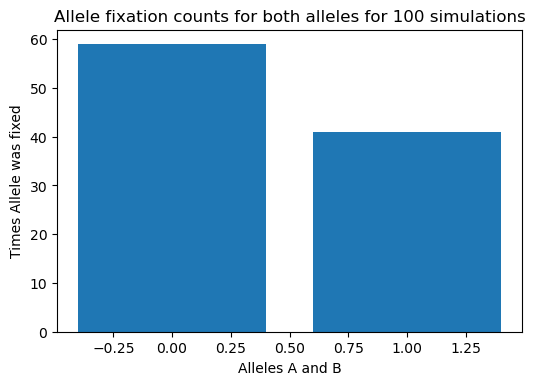

In [796]:
# APPROXIMATION OF FIXATION TIME ON P = 0.6 - DONE ONLY ONE ONE PROBABILITY
# ----- Initialize simulation variables ----- # 

p = 0.6               # Allele A probability
q = 1-p               # Allele B probability
generations = 800     # Around > 500 seems decent, otherwise don't always get fixation
population = 100     
simulations = 100

# Run the simulation with same parameters a large number of times to get average on fixation time
# Potentially plot fixation time versus p 

def get_fix_times_n_fix_alleles(p,q,generations,population,simulations):    # Gets average fixation time based on nb of simulations
    all_fix_times = []
    all_fix_alleles = []
    
    for i in range(simulations):

        distr = clonal_population(p,q,generations,population) 
        all_fix_times.append(distr[1])
        all_fix_alleles.append(distr[2])

    fix_counts = [0,0]
    for allele in all_fix_alleles:
        if allele == "A":
            fix_counts[0] +=1            # Simulations where A is fixed
        else:
            fix_counts[1] +=1            # Simulations where B is fixed

    return all_fix_times,fix_counts

all_fix_times,fix_counts = get_fix_times_n_fix_alleles(p,q,generations,population,simulations)

# Plot distribution of fixation times on a histogram
HIST_BINS = np.linspace(0, generations, 20)     # What is the best number of bins?
HIST_BINS_2 = [0,1] 
plt.figure()
plt.hist(all_fix_times,HIST_BINS)
plt.xlabel("Fixation time (by bin)")
plt.ylabel("Number of fixation times in bin")
plt.title("Distribution of fixation times by starting p probability = 0.6")
plt.show()

# Plot probability of fixing allele A based on p = 0.6
plt.figure()
plt.bar([0,1],fix_counts)
plt.xlabel("Alleles A and B")
plt.ylabel("Times Allele was fixed")
plt.title("Allele fixation counts for both alleles for "+str(simulations)+" simulations")
plt.show()

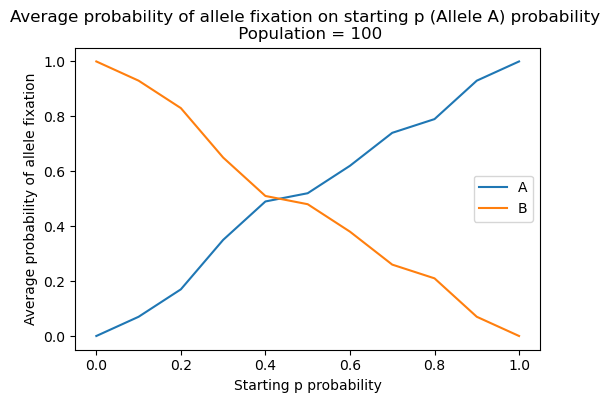

In [871]:
# APPROXIMATION OF FIXATION PROBABILITY FOR ALLELE A ON P GOING FROM 0.1 TO 0.9 DONE LOTS OF TIMES

p_range = np.arange(0,1.1,0.1)      # Test probs from 0.1 to 0.9 in increments (9 items in list)
q_range = 1 - p_range               # 0.9 to 0.1 (not useful here, though)

generations = 800 
population = 100     
simulations = 100

all_fix_counts = [get_fix_times_n_fix_alleles(p_range[i],q_range[i],generations,population,simulations)[1] for i in range(len(p_range))]
all_fix_probs = [[allele_count / simulations for allele_count in allele] for allele in all_fix_counts]

plt.figure()
plot = plt.plot(p_range,all_fix_probs)
plt.legend(plot, ('A', 'B'))
plt.xlabel("Starting p probability")
plt.ylabel("Average probability of allele fixation")
plt.title("Average probability of allele fixation on starting p (Allele A) probability \n Population = "+str(population))
plt.show()

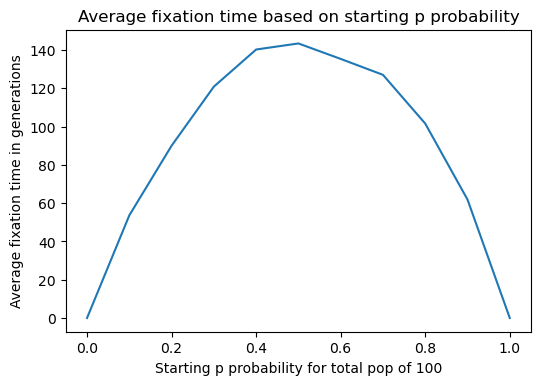

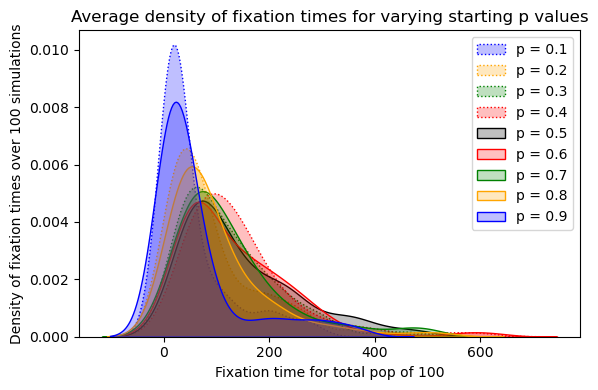

In [872]:
# APPROXIMATION OF FIXATION TIME ON P GOING FROM 0.1 TO 0.9, DONE TEN (OR MORE) TIMES
p_range = np.arange(0,1.1,0.1)      # Test probs from 0.1 to 0.9 in increments (9 items in list)
q_range = 1 - p_range               # 0.9 to 0.1 (not useful here, though)

generations = 800 
population = 100     
simulations = 100

all_fix_list = [get_fix_times_n_fix_alleles(p_range[i],q_range[i],generations,population,simulations)[0] for i in range(len(p_range))]

all_fixation_means = [statistics.mean(i) for i in all_fix_list]     # Get the mean of the fixation time for every starting probability p
#print(all_fixation_means)

plt.figure()
plt.plot(p_range,all_fixation_means)
plt.xlabel("Starting p probability for total pop of "+str(population))
plt.ylabel("Average fixation time in generations")
plt.title("Average fixation time based on starting p probability")
plt.show()

###

fig, ax = plt.subplots()
sns.kdeplot(all_fix_list[1],shade=True,color="blue",label="p = 0.1",linestyle ="dotted")
sns.kdeplot(all_fix_list[2],shade=True,color="orange",label="p = 0.2",linestyle ="dotted")
sns.kdeplot(all_fix_list[3],shade=True,color="green",label="p = 0.3",linestyle ="dotted")
sns.kdeplot(all_fix_list[4],shade=True,color="red",label="p = 0.4",linestyle ="dotted")
sns.kdeplot(all_fix_list[5],shade=True,color="black",label="p = 0.5")
sns.kdeplot(all_fix_list[6],shade=True,color="red",label="p = 0.6")
sns.kdeplot(all_fix_list[7],shade=True,color="green",label="p = 0.7")
sns.kdeplot(all_fix_list[8],shade=True,color="orange",label="p = 0.8")
sns.kdeplot(all_fix_list[9],shade=True,color="blue",label="p = 0.9")

plt.title("Average density of fixation times for varying starting p values")
plt.xlabel("Fixation time for total pop of "+str(population))
plt.ylabel("Density of fixation times over "+ str(simulations)+ " simulations")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

[144.07, 262.38, 453.51, 440.01, 539.05, 537.98, 632.94, 643.95, 660.95, 745.16]


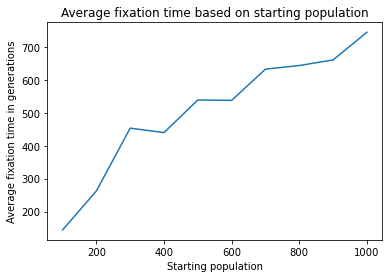

In [264]:
# APPROXIMATION OF FIXATION TIME ON POPULATION GOING FROM 100 TO 1000
p = 0.6      
q = 1 - p  

generations = 800 
population_range = np.arange(100,1001,100)   # Test based on population going from 100 to 1000 (increments of 100)
simulations = 100

all_fix_list = [get_fix_times_n_fix_alleles(p,q,generations,population_range[i],simulations) for i in range(len(population_range))]

ten_fixation_means = [statistics.mean(i) for i in all_fix_list]     # Get the mean of the fixation time for every starting probability p
print(ten_fixation_means)

plt.figure()
plt.plot(population_range,ten_fixation_means)
plt.xlabel("Starting population")
plt.ylabel("Average fixation time in generations")
plt.title("Average fixation time based on starting population")
plt.show()

### **2) Coalescent model**
Simulate a population of N = 100 individuals until all alleles are identical by descent. Select
several random samples of size n = 2,3,4,5 from the population and measure the number of
generations to the most recent ancestor. Are these consistent with the analytical
expressions for the expectations E(T_n) ? Note again in this analysis, that our population now
has N alleles and not 2N.

In [806]:
# TWO ALLELES A AND B - IGNORE THIS ONE FOR NOW, SINCE WE RARELY ARE ABLE TO GET MRCA FROM JUST 2 ALLELES
population = 100 
p = 0.6
q = 1-p

def all_equal(iterable):                                         # Function to check if all elements in group are the same
    g = groupby(iterable)
    return next(g, True) and not next(g, False) 

def coalescent_model_two_alleles(p,q,population):

    # Populate initial population of 100 with two alles A and B with probability p and q
    allele_pop = list(np.ones(int(p*population)))               # Populate A
    second_allele_pop = list(np.zeros(int(q*population)))       # Populate B
    [allele_pop.append(i) for i in second_allele_pop]           # Join A and B to form whole first generation of population

    whole_allele_pop = []
    whole_allele_pop.append(allele_pop)                         # Append in, to be subsequently filled with every generation
    whole_ancestor_indexes = []

    generation_counter = 0

    while True:

        ancestor_indexes = list(np.zeros(population))           # Will contain N-1 sublists of ancestors
        generation_counter += 1
        current_allele_pop = []                                 

        prev_allele_pop = whole_allele_pop[generation_counter-1].copy()

        for j in range(population):
            allele_choice_index = random.choice(range(len(prev_allele_pop)))      # Randomly choose from previous generation, no biases
            ancestor_indexes[j] = allele_choice_index                             
            current_allele_pop.append(prev_allele_pop[allele_choice_index])       # Append into current list of indexes
        
        whole_allele_pop.append(current_allele_pop)                               # Append into global list
        whole_ancestor_indexes.append(ancestor_indexes)                           # Append into global list

        if all_equal(current_allele_pop) == True:                                 # If we have reached identity by descent
            print("Identity by descent found at "+str(generation_counter)+" generations")
            break

    return whole_allele_pop,whole_ancestor_indexes

test = coalescent_model_two_alleles(p,q,population)
# print(test[0])
# print(test[1][len(test[1])])

Identity by descent found at 299 generations


In [827]:
# 100 DIFFERENT ALLELES: 0 TO 99 (BY INDEX)

population = 100                                                # Population of N

def coalescent_model_hundred_alleles(population):               # No p and q necessary (100 equally probable)

    # Populate initial population of 100 with 100 alleles
    allele_pop = list(range(0,population))                      # List of [0, 1, 2 .... 99] for example

    whole_allele_pop = []
    whole_allele_pop.append(allele_pop)                         # Append in, to be subsequently filled with every generation
    whole_ancestor_indexes = []

    generation_counter = 0

    while True:

        ancestor_indexes = list(np.zeros(population))           # Will contain N-1 sublists of ancestors
        generation_counter += 1
        current_allele_pop = []                                 

        prev_allele_pop = whole_allele_pop[generation_counter-1].copy()

        for j in range(population):
            allele_choice_index = random.choice(range(len(prev_allele_pop)))      # Randomly choose from previous generation, no biases
            ancestor_indexes[j] = allele_choice_index                             
            current_allele_pop.append(prev_allele_pop[allele_choice_index])       # Append into current list of indexes
        
        whole_allele_pop.append(current_allele_pop)                               # Append into global list
        whole_ancestor_indexes.append(ancestor_indexes)                           # Append into global list

        #print(current_allele_pop)
        #print(ancestor_indexes)
        
        if all_equal(current_allele_pop) == True:                                 # If we have reached identity by descent
            print("Final generation: ")
            print(current_allele_pop)
            print("Identity by descent found at "+str(generation_counter)+" generations")
            print("The victorious allele is the "+str(current_allele_pop[0])+"th allele")
            break

    return whole_allele_pop,whole_ancestor_indexes              # Will return every generation of a population (N elements)
                                                                # As well as every ancestors of every generation (N-1 elements) since 1st gen has no ancestors
coalescence_simulation = coalescent_model_hundred_alleles(population)

Final generation: 
[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Identity by descent found at 212 generations
The victorious allele is the 64th allele


In [812]:
samples_nb = 3          # Has to be < population; example would be 2/3/4/5 within a population of 100

def find_MRCA(ancestors_n_indexes,samples_nb):     # The indexes should suffice, the entire population alleles is not necessary for this function
    
    # print("Looking for MRCA of "+str(samples_nb)+" samples from latest generation of 100 alleles of type "+str(ancestors_n_indexes[0][len(ancestors_n_indexes[0])-1][0]))
   
    # common_ancestor_search_index = []         # Updateable list to hold indexes of "common ancestry searches"
    # common_ancestor_search_values = []        # Updateable list to hold values @ indexes of "common ancestry searches"
    
    common_ancestor_search_index = np.random.choice( range(len(ancestors_n_indexes[1][len(ancestors_n_indexes[1])-1])), samples_nb, replace = False )
    common_ancestor_search_values = list(ancestors_n_indexes[1][len(ancestors_n_indexes[1])-1][i] for i in common_ancestor_search_index)

    # print("Candidates for random selection are at indexes: "+str(common_ancestor_search_index) + " of final generation")
    # print("Respective ancestors from previous generation are "+ str(common_ancestor_search_values))

    MRCA_count = 1

    while True:                                           # Search for common ancestor loop
        if(all_equal(common_ancestor_search_values)):     # Requires use of previously defined all_equal function (see above coalescent_model function)
            #print("Common ancestor found after "+ str(MRCA_count) +" iterations")         # 1 iteration being the minimum
            break
        if MRCA_count == ( len(ancestors_n_indexes[1]) ):    # If we have reached all the way back to the first generation
            #print("No common ancestor found up till first generation")
            break

        unique_current_gen_values = list(dict.fromkeys(common_ancestor_search_values))   # Converting to dict then back to list removes any non unique element
        common_ancestor_search_index = unique_current_gen_values                         # For ex we go from [0 1 1] to [0 1], which are indexes we need to look at one generation back
        common_ancestor_search_values = list(ancestors_n_indexes[1][len(ancestors_n_indexes[1])-1-MRCA_count][i] for i in common_ancestor_search_index)

        MRCA_count +=1        # Increment time taken to find MCRA

    return common_ancestor_search_index,common_ancestor_search_values,MRCA_count

MRCA_res=find_MRCA(coalescence_simulation,samples_nb)
print("Common ancestor found after "+str(MRCA_res[2])+" generations back")

Common ancestor found after 75 generations back


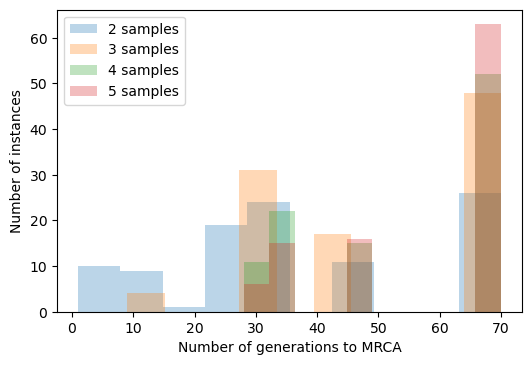

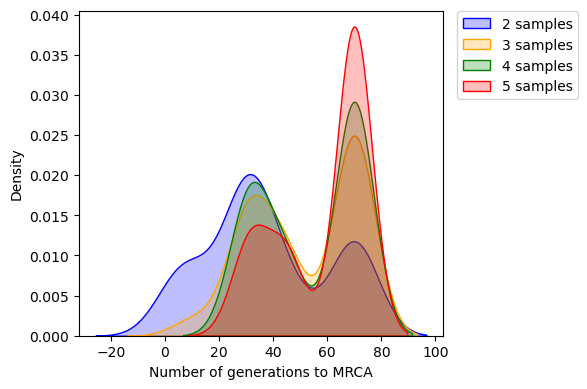

In [829]:
# Function to run MRCA search a fixed nb of times (ex 100)
iterations = 100
samples_nb = 2
samples_nb_range = [2,3,4,5]

def MRCA_mult(iterations,samples_nb,ancestors_n_indexes):
    MRCA_list = []
    for i in range(iterations):
        MRCA_res = find_MRCA(ancestors_n_indexes,samples_nb)      # Run MRCA searches for random samples a set nb of times
        MRCA_list.append(MRCA_res[2])                             # Keep MRCA each time
    return MRCA_list

MRCA_mult_list = [MRCA_mult(iterations,samples_nb_range[i],coalescence_simulation) for i in range(len(samples_nb_range))]

# Plot 4 overlapping histograms of diff/ colors to see average MRCA value?
# Or simply average out MRCA over the nb of iterations for 2,3,4,5?
# Also, should I try this on diff/ datasets?

plt.figure()
plt.hist(MRCA_mult_list[0],bins=10,alpha=0.3,label="2 samples")
plt.hist(MRCA_mult_list[1],bins=10,alpha=0.3,label="3 samples")
plt.hist(MRCA_mult_list[2],bins=10,alpha=0.3,label="4 samples")
plt.hist(MRCA_mult_list[3],bins=10,alpha=0.3,label="5 samples")
plt.xlabel("Number of generations to MRCA")
plt.ylabel("Number of instances")
plt.legend(loc='upper left')
plt.show()

# Function to find every distinct MRCA value and sort them
def find_unique_MRCAs_sorted(MRCA_mult_list):
    MRCA_mult_array = np.array(MRCA_mult_list)
    MRCA_mult_list = list(MRCA_mult_array.flatten())
    
    return sorted(list(set(MRCA_mult_list)))

# Clean seaborn plot to have a density distribution
fig, ax = plt.subplots()
sns.kdeplot(MRCA_mult_list[0],shade=True,color="blue",label="2 samples")
sns.kdeplot(MRCA_mult_list[1],shade=True,color="orange",label="3 samples")
sns.kdeplot(MRCA_mult_list[2],shade=True,color="green",label="4 samples")
sns.kdeplot(MRCA_mult_list[3],shade=True,color="red",label="5 samples")
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel("Number of generations to MRCA")
plt.tight_layout()
plt.show()

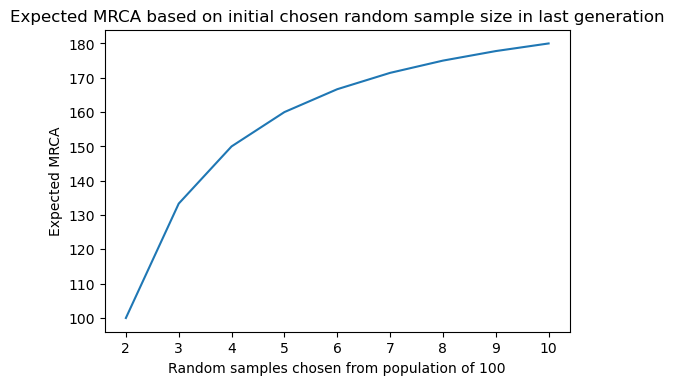

In [873]:
# Expected MRCA as according to formula seen in class
population = 100
plt.figure()
plt.xlabel("Random samples chosen from population of "+str(population))
plt.ylabel("Expected MRCA")
plt.title("Expected MRCA based on initial chosen random sample size in last generation")
plt.plot(range(2,11),[2*population*(1-1/x) for x in range(2,11)])
plt.show()

### **2 - Answers: Coalescent model**
The analytical expressions for expectation E(Tn) is given as 4N/[n*(n-1)].
With our initial population of N = 100 for starting population, the following plot shows the 

### **3) Mutations in the infinite-allele model**
Start from an initially homogeneous population of N identical alleles. Simulate the population
as described before, but with a mutation rate μ measured in mutations / allele / generation.
Each mutation leads to a new allele. Trace the fixation index (probability that two randomly
chosen alleles are identical) over time. Is the result coherent with the balance between
genetic drift and mutation derived in the lectures?

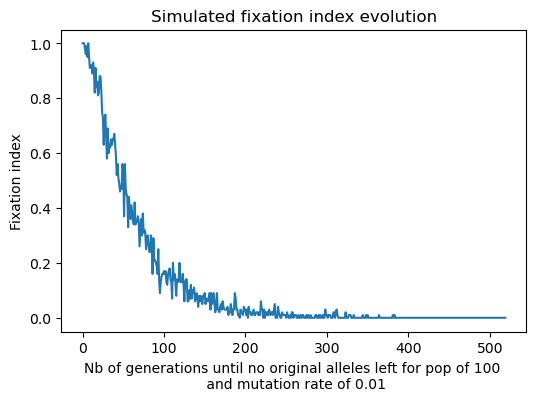

In [831]:
### IMPORTANT: POTENTIALLY OBSOLETE FUNCTION, MISUNDERSTOOD MUTATION RATE
### Mutations: start with a population of 100, and end when none of the original alelles are left 
population = 100
mu = 0.01

### Function to check if all elements in group are the same
def all_equal(iterable):                                         
    g = groupby(iterable)
    return next(g, True) and not next(g, False) 

### Function to simulate inf allele mutation until none of the original population is left
def inf_allele_mutation(population,mutation_rate):

    pop_distr = list(np.ones(population,dtype=int))            # 1 indicates that there has been no mutation yet (OG allele)
    generations = 0
    fixation_probs = []

    while True:
        generations +=1

        # Prob that fixation occurs on 2 completely random selected alleles
        fixation_count = 0
        for j in range(population):                            # Choose randomly as many times as there are individuals in pop
            fixation_choices = random.sample(range(len(pop_distr)),2)      # Randomly choose 2 alleles
            if pop_distr[fixation_choices[0]] == 1 and pop_distr[fixation_choices[1]] == 1: fixation_count += 1
        fixation_probs.append(fixation_count/population)       # Return a percentage chance of fixation

        # For every allele, at every generation, set to 0 if mutation has occured
        for i in range(len(pop_distr)):
            mutation_check = random.random()
            if mutation_check < mu: pop_distr[i] = 0

        # If none of the original alleles are left, leave while loop
        if(all_equal(pop_distr) and sum(pop_distr) == 0):  
            break                                                            

    return pop_distr,generations,fixation_probs

inf_allele_mut_sim = inf_allele_mutation(population,mu)

# print(inf_allele_mut_sim[0])
# print(inf_allele_mut_sim[1])
# print(inf_allele_mut_sim[2])

x = np.arange(0,inf_allele_mut_sim[1])
plt.figure()
plt.plot(x,inf_allele_mut_sim[2])
plt.title("Simulated fixation index evolution")
plt.ylabel("Fixation index")
plt.xlabel("Nb of generations until no original alleles left for pop of "+str(population)+" \n and mutation rate of "+str(mu))
plt.show()

Generations till fixation is 11792


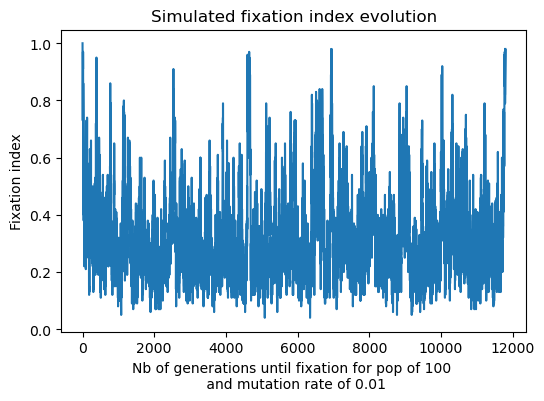

In [932]:
### CORRECTED VERSION OF 3

population = 100
mu = 0.01

### Function to check if all elements in group are the same
def all_equal(iterable):                                         
    g = groupby(iterable)
    return next(g, True) and not next(g, False) 

### Function to simulate inf allele mutation until none of the original population is left
def inf_allele_mutation_2(population,mutation_rate):

    pop_distr = list(np.zeros(population,dtype=int))            
    generations = 0
    fixation_probs = []
    mutation_number = 0         # Every new mutation will increment this

    while True:
        generations +=1         # Count up a generation

        # Check prob that fixation occurs on 2 completely random selected alleles
        # Adjusted to work with replacement
        fixation_count = 0
        for j in range(population):                                        # Run as many times as there are members in pop
            comp = np.random.choice(pop_distr, size=2, replace = False)
            if comp[0] == comp[1]:
                fixation_count += 1
        fixation_probs.append(fixation_count/population)                   # Return a percentage chance of fixation

        # Mutate one (or more) parent alleles
        prev_allele_pop = pop_distr.copy()
        current_allele_pop = [] 
        mut_count = int(population*mutation_rate)

        for l in range(mut_count):
            mutation_number +=1                                # Increment mutation "name"
            mut_index = random.choice(range(len(pop_distr)))   # Choose a position to mutate
            prev_allele_pop[mut_index] = mutation_number       # Replace old allele w/ new unique mutation

        # Populate current population
        for k in range(population):
            allele_choice_index = random.choice(range(len(prev_allele_pop)))      # Randomly choose from previous generation, no biases
            pop_distr[k] = prev_allele_pop[allele_choice_index]                   # Update current pop

        # If none of the original alleles are left, leave while loop
        if(all_equal(pop_distr) == True):  
            break

    return pop_distr,generations,fixation_probs

inf_allele_mut_sim = inf_allele_mutation_2(population,mu)

# print(inf_allele_mut_sim[0])
print("Generations till fixation is "+ str(inf_allele_mut_sim[1]))
# print(inf_allele_mut_sim[2])

x = np.arange(0,inf_allele_mut_sim[1])
plt.figure()
plt.plot(x,inf_allele_mut_sim[2])
plt.title("Simulated fixation index evolution")
plt.ylabel("Fixation index")
plt.xlabel("Nb of generations until fixation for pop of "+str(population)+" \n and mutation rate of "+str(mu))
plt.show()

### **4) Selection**
Introduce selection into the population, considering a two-allelic locus with alleles A of
fitness 1, and B of fitness 1+s. The fitness is realized by selecting a parent allele with a
probability proportional to fitness from the parent population. Follow the fraction of allele B
over time.

Generations till fixation: 250


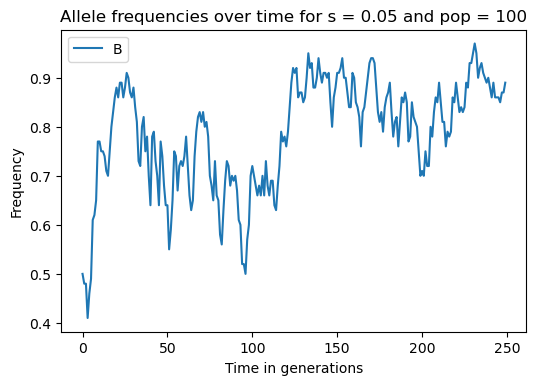

In [848]:
### SELECTION FUNCTION FOR TWO ALLELIC LOCUS

s = 0.05
population = 100
freqs = [0.5,0.5]
fitnesses = [1,1+s]

def clonal_interference(population,freqs,fitnesses):
    
    generations = 0
    all_allele_pops = []
    all_b_allele_freqs = []

    # Create population based on proportions in a totally not messy manner
    # (If I have time, generalize this population creation function for any number of input allele freqs and fitnesses)
    allele_pop = list(np.ones(int(freqs[0]*population),dtype=int))               # A = 1
    second_allele_pop = list(2*np.ones(int(freqs[1]*population),dtype=int))      # B = 2
    [allele_pop.append(i) for i in second_allele_pop]
    all_allele_pops.append(allele_pop)

    b_allele_freqs = freqs[1]                   # List of three allele frequencies; initialised once
    all_b_allele_freqs.append(b_allele_freqs)  # List to hold every allele frequency over iterations

    while True:  
        generations += 1
        allele_counts = [0,0]
        # Count number of letters in allele pop
        for allele in allele_pop:
            if allele == 1: allele_counts[0] += 1  # If allele A
            if allele == 2: allele_counts[1] += 1  # If allele B

        # Apply fitness factor (simply multiply fitness of allele by nb of counts)
        allele_pop_fit = [a*b for a,b in zip(fitnesses,allele_counts) ]

        # Calculate 1/fA*fitA + fB*fit B +... etc
        summation = [round(c*d,3) for c,d in zip(freqs, fitnesses)]
        fraction = 1/sum(summation)      # Should I round this?

        # Calculate new probabilities of this generation
        current_gen_probs = [fraction * allele_pop_fit[k] for k in range(len(allele_pop_fit))]
        
        # ... and assign children based on probs
        for j in range(population):
            random_pick = np.random.random()        

            if random_pick*population < current_gen_probs[0]: allele_pop[j] = 1
            else: allele_pop[j] = 2

        # Count number of letters in allele pop again (to update freqs)
        allele_counts = [0,0]
        for allele in allele_pop:
            if allele == 1: allele_counts[0] += 1  # If allele A
            if allele == 2: allele_counts[1] += 1  # If allele B
        # Update allele frequencies
        allele_freqs = [allele_counts[x]/population for x in range(len(freqs))]

        # Update population distribution and allele frequencies 
        all_allele_pops.append(allele_pop)
        all_b_allele_freqs.append(allele_freqs[1])

        if(generations==250):
            break

    return all_b_allele_freqs,all_allele_pops,generations

clonal_res = clonal_interference(population,freqs,fitnesses)
print("Generations till fixation: "+str(clonal_res[2]))

plt.figure()
x = np.arange(clonal_res[2])
plot = plt.plot(x,[clonal_res[0][y] for y in range(clonal_res[2])])
plt.title("Allele frequencies over time for s = "+str(s)+" and pop = "+str(population))
plt.xlabel("Time in generations")
plt.ylabel("Frequency")
plt.legend(plot, ('B'))
plt.show()

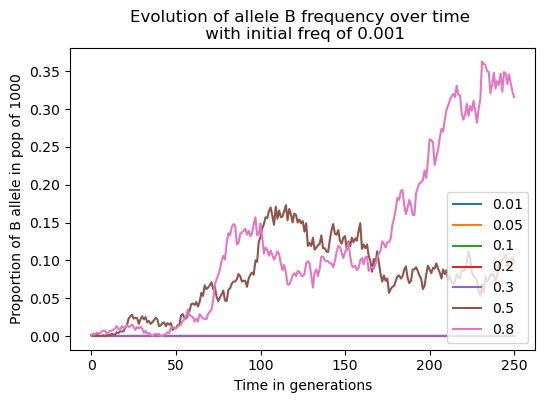

In [863]:
population = 1000
freqs = [0.999, 0.001]
fitnesses = [1,1+s]

s_list = [0.01,0.05,0.1,0.2,0.3,0.5,0.8]
fitnesses_list = [ [1,1+s_list[0]],[1,1+s_list[1]],[1,1+s_list[2]],[1,1+s_list[3]],[1,1+s_list[4]],[1,1+s_list[5]],[1,1+s_list[6]] ]

iterations = [clonal_interference(population,freqs,fitnesses_list[i]) for i in range(len(fitnesses_list))]

plt.figure()
x = np.arange(251)
plt.plot(x, iterations[0][0],label = 0.01)
plt.plot(x, iterations[1][0],label = 0.05)
plt.plot(x, iterations[2][0],label = 0.1)
plt.plot(x, iterations[3][0],label = 0.2)
plt.plot(x, iterations[4][0],label = 0.3)
plt.plot(x, iterations[5][0],label = 0.5)
plt.plot(x, iterations[6][0],label = 0.8)
plt.title("Evolution of allele B frequency over time \n with initial freq of "+str(freqs[1]))
plt.xlabel("Time in generations")
plt.ylabel("Proportion of B allele in pop of "+str(population))
plt.legend(loc="lower right")
plt.show()

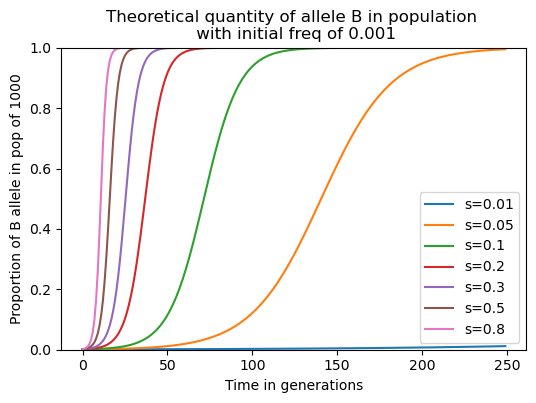

In [901]:
N = 1000
for s in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]:
    N_B = 1
    p = N_B/N
    list_p = []
    for i in range(250):
        p = N_B*(1+s)/(N_B*(1+s)+N-N_B)
        N_B = p*N
        list_p.append(p)
    plt.plot(list_p, label='s='+str(s))


plt.legend()
plt.ylim(0, 1)
plt.title("Theoretical quantity of allele B in population \n with initial freq of 0.001")
plt.xlabel("Time in generations")
plt.ylabel("Proportion of B allele in pop of 1000")
plt.legend(loc="lower right")


plt.show()

### **5) Clonal interference**
Use the setting of Task 4 to observe the evolution of a population with a three-allelic locus.
Allele A with fitness 1 is initially dominant (pA = 0.79), allele B with fitness 1.05 less frequent
(pB = 0.2) and allele C with fitness 1.1 rare (pC = 0.01). Follow the allele frequencies over
time, and use the results to explain the concept of clonal interference.

Generations till fixation: 207


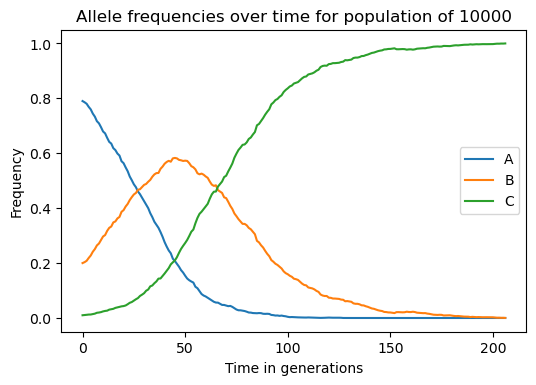

In [929]:
### Clonal interference function
population = 10000
freqs = [0.79,0.2,0.01]
fitnesses = [1,1.05,1.1]

def clonal_interference(population,freqs,fitnesses):

    generations = 0
    all_allele_pops = []
    all_allele_freqs = []

    # Create population based on proportions in a totally not messy manner
    # (If I have time, generalize this population creation function for any number of input allele freqs and fitnesses)
    allele_pop = list(np.ones(int(freqs[0]*population),dtype=int))               # A = 1
    second_allele_pop = list(2*np.ones(int(freqs[1]*population),dtype=int))      # B = 2
    third_allele_pop = list(3*np.ones(int(freqs[2]*population),dtype=int))       # C = 3
    [second_allele_pop.append(i) for i in third_allele_pop]  
    [allele_pop.append(i) for i in second_allele_pop]
    all_allele_pops.append(allele_pop)

    allele_freqs = freqs                   # List of three allele frequencies; initialised once
    all_allele_freqs.append(allele_freqs)  # List to hold every allele frequency over iterations

    while True:  
        generations += 1
        allele_counts = [0,0,0]
        # Count number of letters in allele pop
        # Again, generalise to allow for more than 3 alleles if I have time
        for allele in allele_pop:
            if allele == 1: allele_counts[0] += 1  # If allele A
            if allele == 2: allele_counts[1] += 1  # If allele B
            if allele == 3: allele_counts[2] += 1  # If allele C

        frac = allele_counts[0]+allele_counts[1]*fitnesses[1]+allele_counts[2]*fitnesses[2]
        prob_A = allele_counts[0]/frac
        prob_B = allele_counts[1]*fitnesses[1]/frac
        prob_C = allele_counts[2]*fitnesses[2]/frac
        
        # ... and assign children based on probs
        for j in range(population):
            random_pick = np.random.random()        

            if random_pick< prob_A: allele_pop[j] = 1
            if prob_A < random_pick < prob_A+prob_B: allele_pop[j] = 2
            if random_pick> prob_A+prob_B: allele_pop[j] = 3

        # Count number of letters in allele pop again (to update freqs)
        allele_counts = [0,0,0]
        for allele in allele_pop:
            if allele == 1: allele_counts[0] += 1  # If allele A
            if allele == 2: allele_counts[1] += 1  # If allele B
            if allele == 3: allele_counts[2] += 1  # If allele C
        # Update allele frequencies
        allele_freqs = [allele_counts[x]/population for x in range(len(freqs))]

        # Update population distribution and allele frequencies 
        all_allele_pops.append(allele_pop)
        all_allele_freqs.append(allele_freqs)

        if(all_equal(allele_pop)==True):
            break

    return all_allele_freqs,all_allele_pops,generations

clonal_res = clonal_interference(population,freqs,fitnesses)
# print(clonal_res[0])
print("Generations till fixation: "+str(clonal_res[2]))

plt.figure()
x = np.arange(clonal_res[2])
plot = plt.plot(x,[clonal_res[0][y] for y in range(clonal_res[2])])
plt.title("Allele frequencies over time for population of "+str(population))
plt.xlabel("Time in generations")
plt.ylabel("Frequency")
plt.legend(plot, ('A', 'B','C'))
plt.show()

### **6) Population structure**
Divide the population of Task 1 now in 10 equally large sub-populations. Simulate the
system with a complete separation of the sub-populations: parents are selected only in the
same subpopulation, and no mutation, selection or migration exists. How does the evolution
of the population change as compared to Task 1?

In [3]:
### Subpopulation function

p = 0.5
q = 1-p
generations = 750
population = 100
subpopulation_nb = 10

# function to generate set nb of subpopulations from initial population size and simulate on them
# note: need to make sure that diving the population by number of subpopulations results in an integer
def clonal_subpopulations(p,q,generations,population,subpopulation_nb):

    subpopulation_size = int(population/subpopulation_nb)                                 # Calculate subpopulation size

    p_subpopulation = p*subpopulation_size
    q_subpopulation = subpopulation_size - p_subpopulation
    
    subpop_fixation_times = list(np.zeros(subpopulation_nb))
    subpop_fixed_alleles = ['Z','Z','Z','Z','Z','Z','Z','Z','Z','Z']                      # Placeholder to hold all fixed alleles for each subpopulation
    
    current_pop_distribution = [p_subpopulation,q_subpopulation]                          # [6,4] using initial parameters       
    whole_subpop_dist = [current_pop_distribution for i in range(subpopulation_nb)]       # Initialise a 2 by 10 list to hold subpopulation distributions
        
    for j in range(subpopulation_nb):                            # Simulate each subpopulation once over X generations before they reach fixation
        #print(current_pop_distribution)
        for k in range(generations):                             # Simulate each subpopulation for a nb of generations or until they break
            current_pop_distribution = [0 for l in range(2)]     # Empty probability distribution each new generation
            p = whole_subpop_dist[j][0]                          # Get new probability based on last generation
            q = 1-p

            for m in range(subpopulation_size):                  # For every member of population,               
                if np.random.random()*subpopulation_size < p:            # Use np.random to determine allele
                    current_pop_distribution[0] += 1             # We have picked A as RNG < p
                else:
                    current_pop_distribution[1] += 1             # We have picked B as RNG > p
            whole_subpop_dist[j] = current_pop_distribution

            if current_pop_distribution[0]*current_pop_distribution[1] == 0:    # If product of p and q is 0, aka if one population became 0
                if(current_pop_distribution[1]==0):
                    subpop_fixed_alleles[j] = 'A'
                else:
                    subpop_fixed_alleles[j] = 'B'
                
                break                                            
            subpop_fixation_times[j]+=1                          
        
    return whole_subpop_dist,subpop_fixed_alleles,subpop_fixation_times,statistics.mean(subpop_fixation_times)         
    # Returns distribution of all subpopulations, their fixed alleles, and their fix times.

sub = clonal_subpopulations(p,q,generations,population,subpopulation_nb)

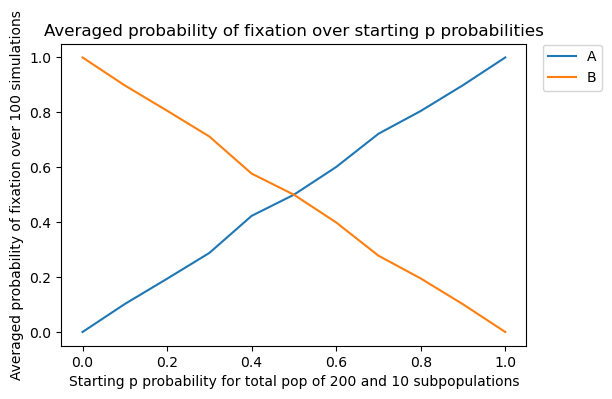

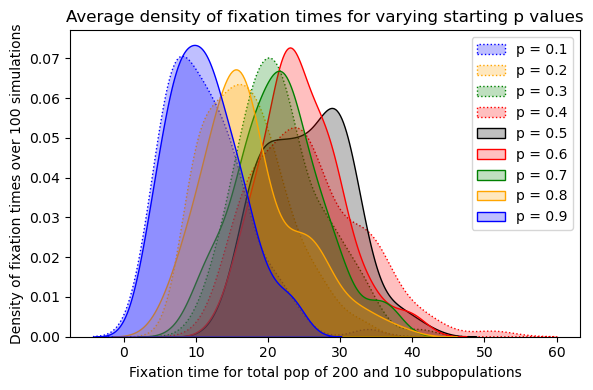

In [888]:
# FUNCTIONS AND PLOTS TO VISUALISE AVERAGE FIXATION TIMES AND FIXATION PROBABILITIES
# PROBABILITIES HAVE BEEN AVERAGED OVER 10 SUBPOPULATIONS AND 100 SIMULATIONS
# FIXATION TIMES HAVE NOT BEEN AVERAGED, HENCE WHY THE DENSITY PLOTS (1000 TOTAL VALUES)

p = 0.5
q = 1- p 
p_range = np.arange(0,1.1,0.1)      # Test probs from 0.1 to 0.9 in increments (9 items in list)
q_range = 1 - p_range               # 0.9 to 0.1 (not useful here, though)

generations = 800 
population = 200     
simulations = 100
subpopulation_nb = 10

def clonal_subpopulations_fix_time_n_prob(p,q,generations,population,subpopulation_nb,simulations):
    
    all_fix_times = []
    all_fix_alleles = []
    all_average_fix_times = []
    
    for i in range(simulations):
        fetch = clonal_subpopulations(p,q,generations,population,subpopulation_nb)
        all_fix_alleles.append(fetch[1])
        all_fix_times.append(fetch[2])
        all_average_fix_times.append(fetch[3])
         
    A_count = 0
    for row in all_fix_alleles:
        for letter in row:
            if letter == "A":
                A_count+=1
    A_fixation_prob = (A_count/(simulations*subpopulation_nb))           
    # IMPORTANT: the above fixation probability is done by counting the total number of A occurences in a (simulation*nb of subpopulations)
    # 1000 size list. Essentially, we average 10 subpopulations' * 100 simulations' probability of fixing A - so only one value is returned.
    
    return all_average_fix_times,A_fixation_prob

# Averaged fixation probabilities for starting p = 0.1 to 0.9 

ten_fix_probs = [clonal_subpopulations_fix_time_n_prob(p_range[i],q_range[i],generations,population,subpopulation_nb,simulations)[1] for i in range(len(p_range))]

plt.figure()
plt.plot(np.arange(0,1.1,0.1),ten_fix_probs,label="A")
plt.plot(np.arange(0,1.1,0.1),list(np.ones(11)-ten_fix_probs),label="B")

plt.xlabel("Starting p probability for total pop of "+str(population)+" and "+str(subpopulation_nb)+" subpopulations")
plt.ylabel("Averaged probability of fixation over 100 simulations")
plt.title("Averaged probability of fixation over starting p probabilities")
plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.show()

# Density plot of average fixation times for starting p = 0.1 to 0.9

ten_density_funcs = [clonal_subpopulations_fix_time_n_prob(p_range[j],q_range[j],generations,population,subpopulation_nb,simulations)[0] for j in range(len(p_range))]
fig, ax = plt.subplots()
sns.kdeplot(ten_density_funcs[1],shade=True,color="blue",label="p = 0.1",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[2],shade=True,color="orange",label="p = 0.2",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[3],shade=True,color="green",label="p = 0.3",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[4],shade=True,color="red",label="p = 0.4",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[5],shade=True,color="black",label="p = 0.5")
sns.kdeplot(ten_density_funcs[6],shade=True,color="red",label="p = 0.6")
sns.kdeplot(ten_density_funcs[7],shade=True,color="green",label="p = 0.7")
sns.kdeplot(ten_density_funcs[8],shade=True,color="orange",label="p = 0.8")
sns.kdeplot(ten_density_funcs[9],shade=True,color="blue",label="p = 0.9")
# Note: deliberately made "symmetrical" starting p values the same colors

plt.title("Average density of fixation times for varying starting p values")
plt.xlabel("Fixation time for total pop of "+str(population)+" and "+str(subpopulation_nb)+" subpopulations")
plt.ylabel("Density of fixation times over "+ str(simulations)+ " simulations")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### **7) Migration**
Use the population of Task 6, but introduce a migration of a fraction m = 0.1 of each
population towards and from randomly chosen subpopulations (i.e. the subpopulations
exchange individuals, but remain of the same size). Estimate the expected fixation time and
compare to Task 1.

In [885]:
p = 0.5                   # A allele frequency
q = 1-p                   # B allele frequency

# generations = 750       # Obsolete, just use a while loop instead that breaks out when global fixation reached
population = 100
subpopulation_nb = 10
migration_index = 0.1

### Function to check if all elements in group are the same
def all_equal(iterable):                                         
    g = groupby(iterable)
    return next(g, True) and not next(g, False) 

### Function to generate set nb of subpopulations from initial population size and simulate on them
### Note: need to make sure that diving the population by number of subpopulations results in an integer
def clonal_subpopulations_migrations(p,q,generations,population,subpopulation_nb,migration_index):

    allele_pop = list(np.ones(round(p*population/subpopulation_nb), dtype=int))               # Populate A
    second_allele_pop = list(np.zeros(round(q*population/subpopulation_nb), dtype=int))       # Populate B
    [allele_pop.append(i) for i in second_allele_pop]   

    all_subpops = [allele_pop for j in range(subpopulation_nb)]

    fixation_time = 0
    subpop_fixation_times = list(np.zeros(subpopulation_nb))
    subpop_fixed_alleles = ['Z','Z','Z','Z','Z','Z','Z','Z','Z','Z']

    fixation_reached = list(np.zeros(subpopulation_nb))              # List where 1 if fixation reached, 0 if otherwise, for each subpopulation

    ### While we haven't reached fixation for all ten of the subpopulations
    while True:
        fixation_time +=1                                            # Update fixation time
        for m in range(subpopulation_nb):                            # Run every subpopulation once per generation, then start over
            # First compute new subpopulation children from parents
            current_subpop = [random.choice(all_subpops[m]) for k in range(int(population/subpopulation_nb))]

            # Then, introduce migration relative to another random subpopulation (except itself)
            migration_choice = list(range(0,subpopulation_nb))                                  # To allow choosing other subpop for migration 
            migration_nb = migration_index*int(population/subpopulation_nb)       # Number of alleles to migrate each generation (1 for index of 0.1)
            subpop_migration_choice = migration_choice.copy()
            subpop_migration_choice.remove(m)                                     # Remove possibility of choosing itself for migration
            
            for i in range(int(migration_nb)):
                chosen_destination = random.choice(subpop_migration_choice)                                 # Chooses a destination subpopulation
                chosen_allele_index = random.choice(range(len(all_subpops[chosen_destination])))            # Choose a position in destination
                chosen_allele = all_subpops[chosen_destination][chosen_allele_index]                        # Get allele from that position
                # Note: we consider that we're swapping the same allele indexes for departure and arrival (for migration)
                all_subpops[chosen_destination][chosen_allele_index] = current_subpop[chosen_allele_index]  # Swap allele at destination
                current_subpop[chosen_allele_index] = chosen_allele                                         # Swap allele at origin

            # Append this subpopulation to whole population list
            all_subpops[m] = current_subpop

            # Check if this subpopulation has reached fixation
            if(all_equal(current_subpop) == True):
                fixation_reached[m] = 1
                subpop_fixed_alleles[m] = current_subpop[0]
                subpop_fixation_times[m] = fixation_time
            # If fixation is not reached. Important: this can change if migration causes a previously fixed population to unfix!
            else:
                fixation_reached[m] = 0

        if(all_equal(fixation_reached) and sum(fixation_reached) == subpopulation_nb):  # If fixation is reached for all 10 subpopulations
            break                                                                       # Leave while loop

    # return subpop_fixed_alleles,subpop_fixation_times                                 # Returning the first elements is enough (all the same)
    return subpop_fixed_alleles[0],subpop_fixation_times[0]

migrations_results = clonal_subpopulations_migrations(p,q,generations,population,subpopulation_nb,migration_index)
print("Fixed allele is allele "+str(migrations_results[0]) + " (0 is A, 1 is B)")
print("Global fixation time is "+str(migrations_results[1]))

Fixed allele is allele 1 (0 is A, 1 is B)
Global fixation time is 330


In [886]:
### Migration with subpopulations for 100 simulations and varying starting p values

def migration_get_fix_times_n_fix_alleles(p,q,generations,population,subpopulation_nb,migration_index,simulations):
    
    all_fix_alleles = []
    all_fix_times = []
    
    for i in range(simulations):
        fetch = clonal_subpopulations_migrations(p,q,generations,population,subpopulation_nb,migration_index)
        all_fix_alleles.append(fetch[0])
        all_fix_times.append(fetch[1])

    A_count = 0
    for allele in all_fix_alleles:
            if allele == 0:
                A_count+=1
    A_fixation_prob = (A_count/(simulations))

    return A_fixation_prob,all_fix_times

###################################################################################################################################################

# testy = migration_get_fix_times_n_fix_alleles(p,q,generations,population,subpopulation_nb,migration_index,simulations)
# print(testy[0])
# print(testy[1])

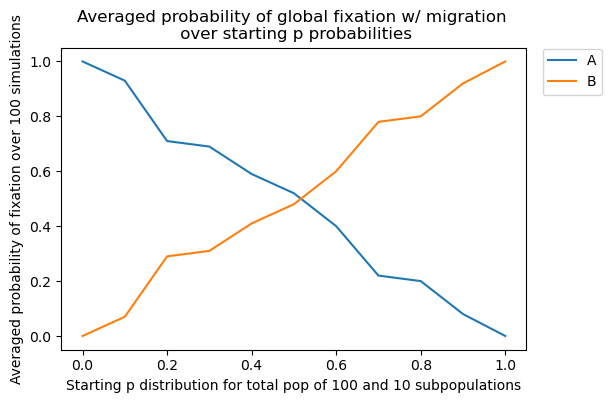

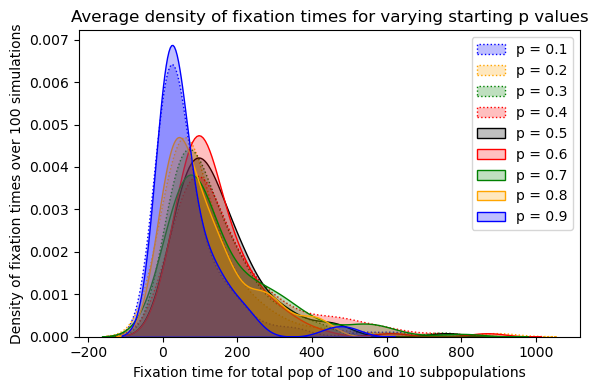

In [890]:
# Averaged fixation probabilities for starting p = 0.1 to 0.9 
p = 0.5
q = 1- p 
p_range = np.arange(0,1.1,0.1)      # Test probs from 0.1 to 0.9 in increments (9 items in list)
q_range = 1 - p_range               # 0.9 to 0.1 (not useful here, though)

generations = 800 
population = 100     
simulations = 100
subpopulation_nb = 10
migration_index = 0.1

ten_fix_probs = [migration_get_fix_times_n_fix_alleles(p_range[i],q_range[i],generations,population,subpopulation_nb,migration_index,simulations)[0] for i in range(len(p_range))]

plt.figure()
plt.plot(np.arange(0,1.1,0.1),ten_fix_probs,label="A")
plt.plot(np.arange(0,1.1,0.1),list(np.ones(11)-ten_fix_probs),label="B")

plt.xlabel("Starting p distribution for total pop of "+str(population)+" and "+str(subpopulation_nb)+" subpopulations")
plt.ylabel("Averaged probability of fixation over 100 simulations")
plt.title("Averaged probability of global fixation w/ migration \n over starting p probabilities")
plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.show()

# Density plot of average fixation times for starting p = 0.1 to 0.9

ten_density_funcs = [migration_get_fix_times_n_fix_alleles(p_range[i],q_range[i],generations,population,subpopulation_nb,migration_index,simulations)[1] for i in range(len(p_range))]

############
# ten_density_funcs = [clonal_subpopulations_fix_time_n_prob(p_range[j],q_range[j],generations,population,subpopulation_nb,simulations)[0] for j in range(len(p_range))]
fig, ax = plt.subplots()
sns.kdeplot(ten_density_funcs[1],shade=True,color="blue",label="p = 0.1",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[2],shade=True,color="orange",label="p = 0.2",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[3],shade=True,color="green",label="p = 0.3",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[4],shade=True,color="red",label="p = 0.4",linestyle ="dotted")
sns.kdeplot(ten_density_funcs[5],shade=True,color="black",label="p = 0.5")
sns.kdeplot(ten_density_funcs[6],shade=True,color="red",label="p = 0.6")
sns.kdeplot(ten_density_funcs[7],shade=True,color="green",label="p = 0.7")
sns.kdeplot(ten_density_funcs[8],shade=True,color="orange",label="p = 0.8")
sns.kdeplot(ten_density_funcs[9],shade=True,color="blue",label="p = 0.9")
# Note: deliberately made "symmetrical" starting p values the same colors

plt.title("Average density of fixation times for varying starting p values")
plt.xlabel("Fixation time for total pop of "+str(population)+" and "+str(subpopulation_nb)+" subpopulations")
plt.ylabel("Density of fixation times over "+ str(simulations)+ " simulations")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()